In [1]:
import pandas as pd
import numpy as np

# Load 
data = pd.read_csv('activity_data.csv').drop(columns=['activity_id', 'date'])
data.head()

,distance_meters,elevation_gain,duration_seconds,hour_of_day,atl_start,ctl_start,watt_kg,avg_temperature,dh_extreme_pct,dh_pct,green_pct,yellow_pct,orange_pct,red_pct,black_pct
0,23352.9,565.6,292028.0,15,21.235756,14.241416,2.206186,11.905305,0.025186,0.281482,0.421094,0.112652,0.087913,0.045050,0.026621
1,18987.0,596.8,983907.0,15,12.208211,13.982171,2.206186,10.865782,0.039445,0.306947,0.304518,0.087300,0.132748,0.083217,0.045826
2,23681.8,763.8,1219984.0,8,18.256845,15.328999,2.206186,14.139014,0.042519,0.255555,0.290030,0.103856,0.190613,0.076095,0.041332
3,18932.3,553.6,1414544.0,15,27.683079,17.396097,2.206186,10.560117,0.034169,0.318324,0.280189,0.118634,0.182281,0.045036,0.021367
4,23733.3,703.0,1675124.0,15,27.337395,18.283237,2.206186,11.753166,0.030927,0.291025,0.291667,0.093512,0.175628,0.085923,0.031319


In [2]:
# Train a Linear Regression model
# Use std scaler to scale the data

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predict_feature = 'duration_seconds'

X = data.drop(columns=[predict_feature])
y = data[predict_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 3885195696579.549
Mean Absolute Error: 1343159.5021433064
R2 Score: 0.7831836880291905


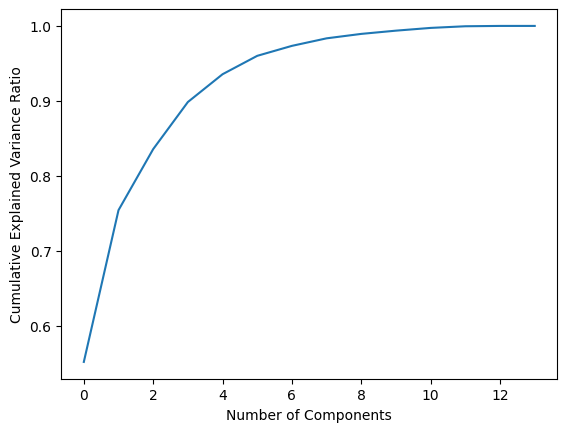

In [3]:
# Apply PCA
# Get the number of components that explain 95% and plot the explained variance ratio

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
X_train_pca = pca.fit_transform(X_train)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

n_components = np.argmax(cumulative_explained_variance_ratio >= 0.99) + 1
print('Number of components that explain 99%:', n_components)

# Train a Linear Regression model with the PCA components
# Use std scaler to scale the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = LinearRegression()
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))


Number of components that explain 99%: 10
Mean Squared Error: 905695410607.0835
Mean Absolute Error: 703914.5287090833
R2 Score: 0.9494569761647796


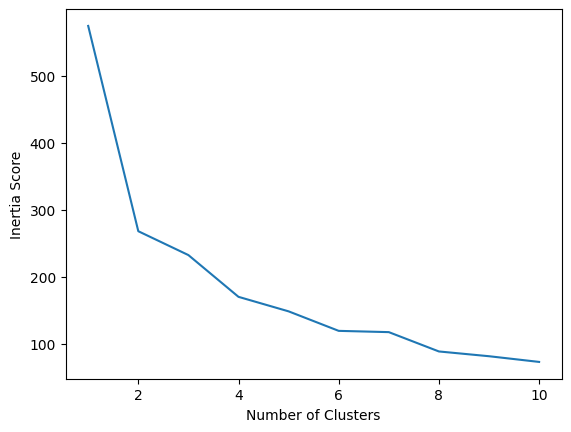

In [8]:
# Perform a clustering analysis with inertia score

from sklearn.cluster import KMeans

inertia_scores = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_train)
    inertia_scores.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.show()


In [ ]:
# Best number of clusters
n_clusters = 3

